# PyCaret Notes
PyCaret is an open-source, low-code ML library to reduce the hypoithesis to insights cycle time in ML experiments. It can replace hundreds of lines of code with only a few, easy to read lines.

In [1]:
import pandas as pd

## Binary Classification

In [2]:
from pycaret.datasets import get_data #using PyCaret's data repository to load the data in
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#check shape of the data
dataset.shape

(24000, 24)

In order to demonstrate the predict_model() function on unseen data, a sample of 1200 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1200 records are not available at the time when the machine learning experiment was performed.

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [5]:
from pycaret.classification import *

# setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.
# must be called before executing any other function in pycaret
# mandatory parameters: pd dataframe and name of the target col
exp_clf101 = setup(data=data, target='default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


* Looking above, When setup() is executed, PyCaret's will automatically infer the data types for all features based on certain properties. 
* The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types.
* If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment.

In [6]:
'''
Comparing all models to evaluate performance is a good starting point for modelling once setup is completed.
compare_models() trains all models in the library and scores them using stratified cross validation
TT is training times.
'''
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0290
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1360
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,1.6030
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.4150
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.1310
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.6920
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.6520
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.5240
dummy,Dummy Classifier,0.7814,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.1910


In [7]:
'''
The grid above is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the sort parameter. 
For example compare_models(sort = 'Recall')
'''
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


In [8]:
#shows all 18 classifiers available in PyCaret
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


`create_model` trains and evaluates a model using cross validation, that can be set with the `fold` parameter.

### Decision Tree

In [9]:
dt = create_model('dt')

In [10]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### KNN Classifier

In [11]:
knn = create_model('knn')

In [12]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### Random Forests

In [13]:
rf = create_model('rf')

In [14]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


### Tuning a Model
`tune_model` automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space.

In [15]:
tuned_rf = tune_model(rf)

### Plotting a Model
Before model finalization, `plot_model()` can analyze performance using AUC, confusion matrix, decision boundary, etc.
* Takes a trained model object and returns a plot based on the test set

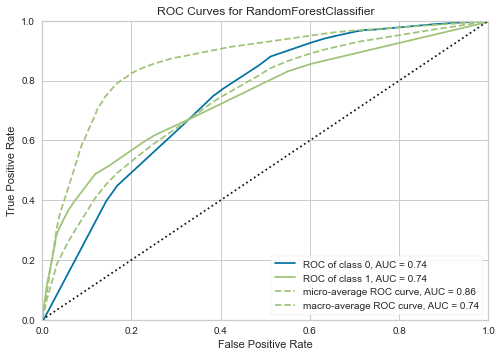

In [16]:
plot_model(tuned_rf, plot = 'auc')

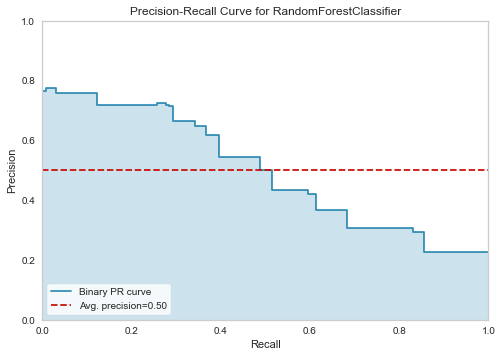

In [17]:
plot_model(tuned_rf, plot = 'pr')

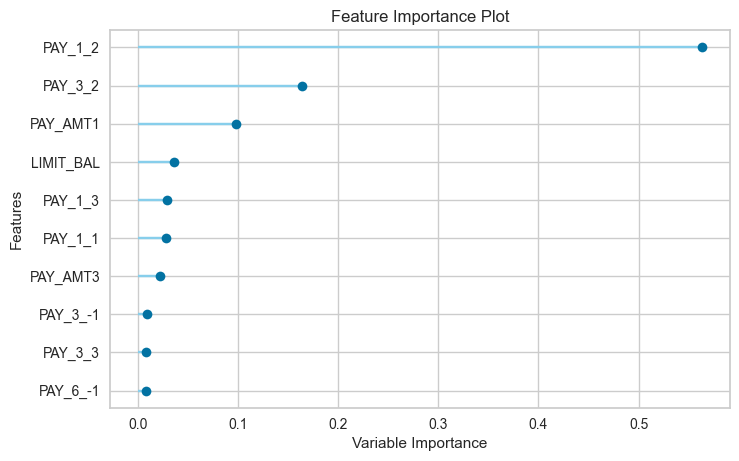

In [18]:
plot_model(tuned_rf, plot='feature')

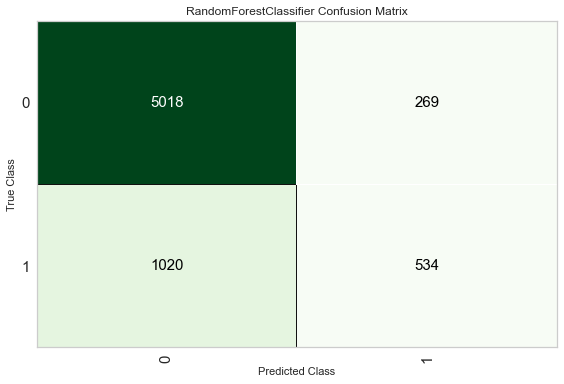

In [19]:
plot_model(tuned_rf, plot = 'confusion_matrix')

Another way to analyze performance is to use `evaluate_model` to display a UI of all available plots for the model.

In [21]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict on test sample
Perform one last check by predicting on the test set and review the metrics